### Student Information
Name: Kelvin 

Student ID: 107065424

GitHub ID: xavier2696

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [2]:
### Begin Assignment Here!

In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
#imports and setup
import pandas as pd
import helpers.data_mining_helpers as dmh
import nltk
nltk.download('punkt')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import plotly
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xavie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences_data/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += amazon_data.read().split('\n')
with open("sentiment_labelled_sentences_data/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += imdb_data.read().split('\n')
with open("sentiment_labelled_sentences_data/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += yelp_data.read().split('\n')

sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

In [5]:
# create dataframe
sentiment_data_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores']})
print(sentiment_data_df[:10])

  score                                           sentence
0     0  So there is no way for me to plug it in here i...
1     1                        Good case, Excellent value.
2     1                             Great for the jawbone.
3     0  Tied to charger for conversations lasting more...
4     1                                  The mic is great.
5     0  I have to jiggle the plug to get it to line up...
6     0  If you have several dozen or several hundred c...
7     1        If you are Razr owner...you must have this!
8     0                Needless to say, I wasted my money.
9     0                   What a waste of money and time!.


In [10]:
#data exploration and data operation
#check for missing values
sentiment_data_df.isnull().apply(lambda x: dmh.check_missing_values(x))
#there are no missing values in the dataset, the sentiment_data_dictionary method in the helpers file will
#ignore any rows that contain either a sentence none value or a score none value

#in this case I think it is better to ignore the rows that contain a none value because there is no way to generate
#a sentence if it is missing and if we try to estimate a 0 or 1 value for the score it will just contaminate the data

score       The amoung of missing records is: 0
sentence    The amoung of missing records is: 0
dtype: object

In [7]:
#check if there are duplicated rows and remove them
duplicates = sum(sentiment_data_df.duplicated('sentence'))
print('Number of rows before cleaning: %d' % len(sentiment_data_df))
print('Duplicated rows: %d' % duplicates)
if duplicates > 0:
    sentiment_data_df.drop_duplicates(keep=False, inplace=True)
    
print('Number of rows after cleaning: %d' % len(sentiment_data_df))

Number of rows before cleaning: 3000
Duplicated rows: 17
Number of rows after cleaning: 2966


In [27]:
#sampling
n = 500
sentiment_data_sample = sentiment_data_df.sample(n=n, random_state=26)

AxesSubplot(0.125,0.125;0.775x0.755)


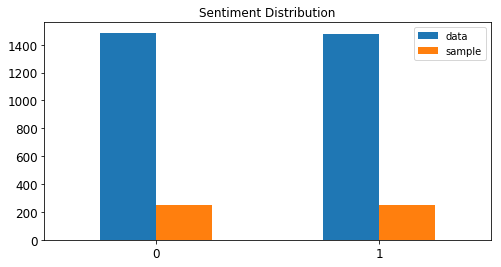

In [12]:
#show the sampling and actual data counts in a bar graph
sample_counts = sentiment_data_sample.score.value_counts()
actual_counts = sentiment_data_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 12, figsize = (8,4), tick_label = ['negative', 'positive']))

In [16]:
#feature creation
#unigrams
sentiment_data_df['unigrams'] = sentiment_data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [32]:
#feature subset selection
count_vect = CountVectorizer()
sentiment_counts = count_vect.fit_transform(sentiment_data_df.sentence)
print("Document Term Matrix Size:", sentiment_counts.shape)

Document Term Matrix Size: (2966, 5157)


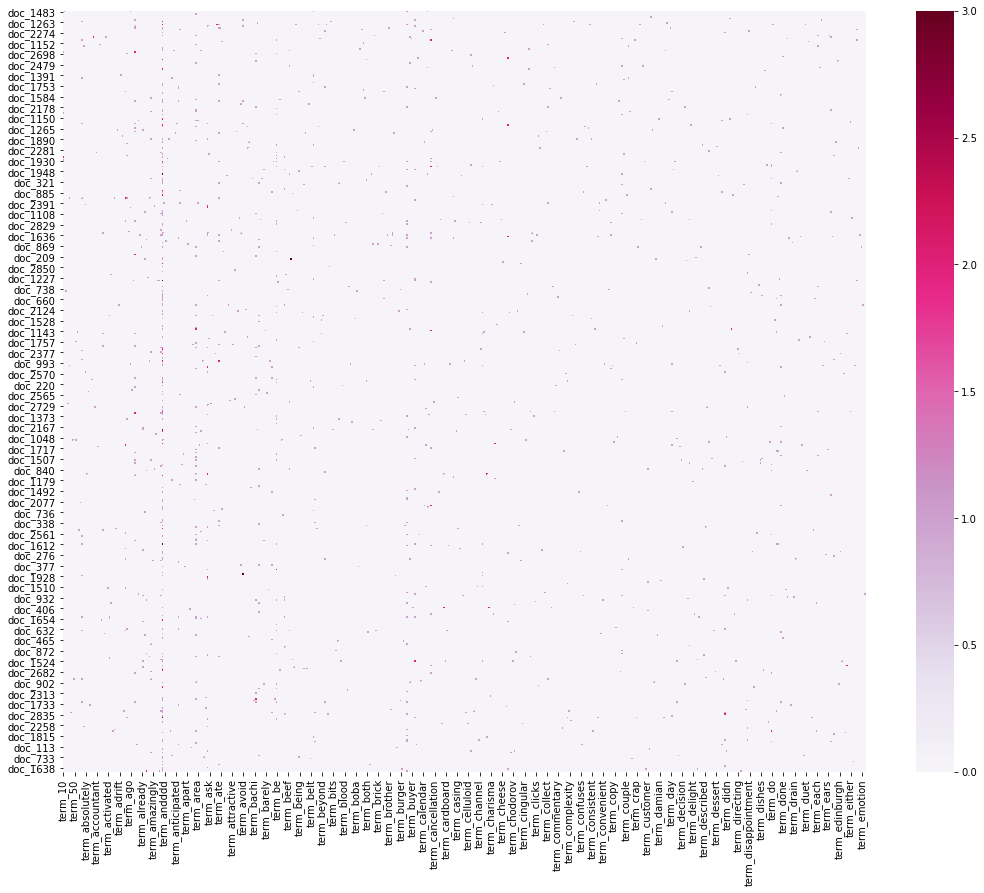

In [33]:
#heaptmap visualization
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sentiment_data_sample.sentence)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]
plot_y = ["doc_"+ str(i) for i in list(sentiment_data_sample.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

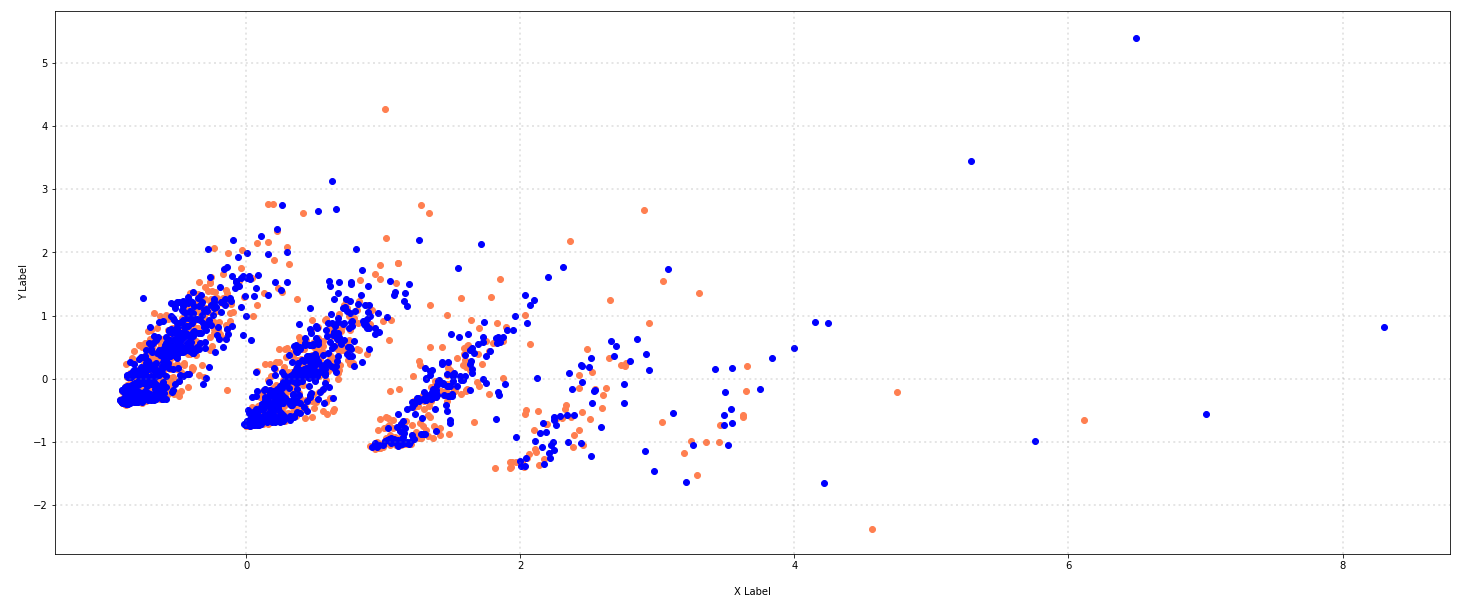

In [38]:
#dimensionality reduction
#2 dimension PCA
colors = ['coral', 'blue']
scores = ['0','1']

sentiment_data_reduced2 = PCA(n_components = 2).fit_transform(sentiment_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

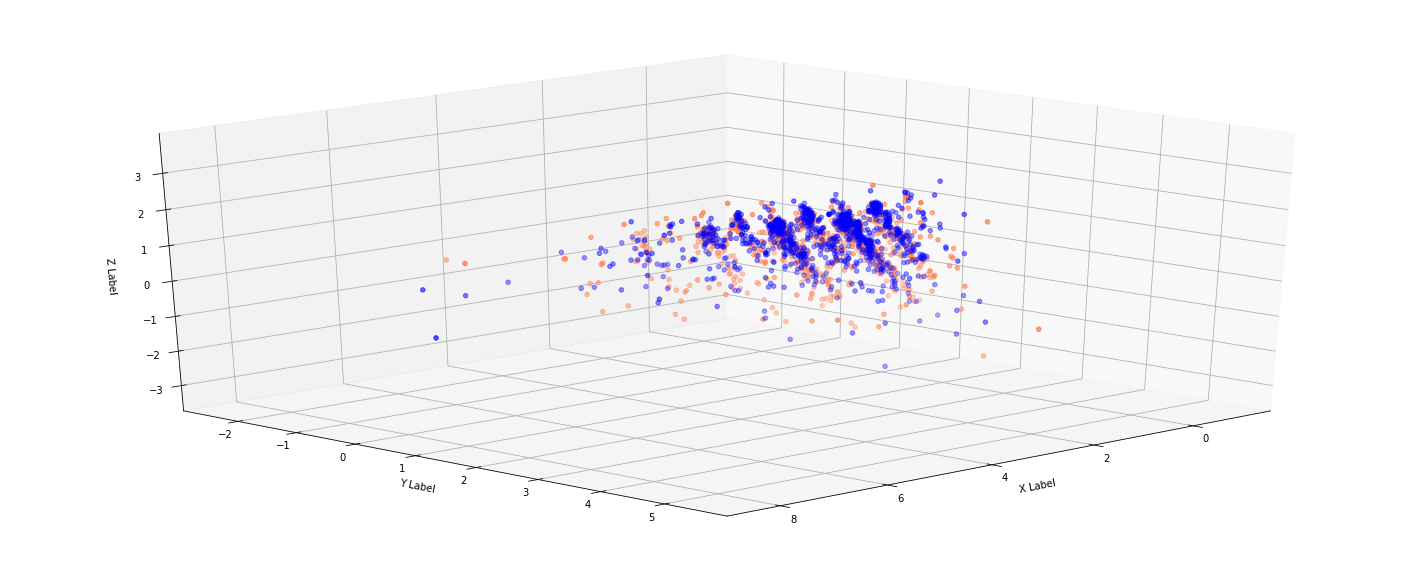

In [47]:
#3 dimension PCA
sentiment_data_reduced3 = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(1,1,1, projection='3d')

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[1]
    zs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(25, 45)

plt.show()

In [55]:
#attribute transformation/aggregation
#create a term frequencies array
term_frequencies = np.asarray(sentiment_counts.sum(axis=0))[0]

#term frequencies visualization
data = [go.Bar(
            x=["term_"+str(i) for i in count_vect.get_feature_names()],
            y=term_frequencies
    )]

py.iplot(data, filename='Term Frequencies')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xavier2696/0 or inside your plot.ly account where it is named 'Term Frequencies'


In [56]:
#ordered term frequencies visualization
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
ordered_term_frequencies_df = term_frequencies_df.sort_values(by = 'counts', ascending = False)
ordered_data = [go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts']
    )]

py.iplot(ordered_data, filename = 'Ordered Data Terms')

In [59]:
#binarization
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_data_df.score)
sentiment_data_df['bin_score'] = mlb.transform(sentiment_data_df['score']).tolist()
sentiment_data_df[0:9]
#in this case binarization does not changes the score values because there are only 2 possible values in score to begin with

,score,sentence,unigrams,bin_score
0,0,So there is no way for me to plug it in here i...,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,1,"Good case, Excellent value.","[Good, case, ,, Excellent, value, .]",[1]
2,1,Great for the jawbone.,"[Great, for, the, jawbone, .]",[1]
3,0,Tied to charger for conversations lasting more...,"[Tied, to, charger, for, conversations, lastin...",[0]
4,1,The mic is great.,"[The, mic, is, great, .]",[1]
5,0,I have to jiggle the plug to get it to line up...,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,0,If you have several dozen or several hundred c...,"[If, you, have, several, dozen, or, several, h...",[0]
7,1,If you are Razr owner...you must have this!,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,0,"Needless to say, I wasted my money.","[Needless, to, say, ,, I, wasted, my, money, .]",[0]
